In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
# 步骤一: 加载数据集
# 1.1 利用Pandas库read_csv函数读取'Stock_Exchange.csv'文件至DateFrame类型数据data
... #请在此处编写代码
data = pd.read_csv('Stock_Exchange.csv')
# 1.2 使用to_datetime函数将DateFrame数据中的'Date'列由字符串形式转为日期时间对象
... #请在此处编写代码
data['Date'] = pd.to_datetime(data['Date'])
# 1.3 使用set_indx函数将'Date'设为索引值
data.set_index('Date', inplace=True)

In [3]:
# 步骤二: 数据预处理及特征工程
# 2.1 提取时间('Date'中year、mouth、day、dayofweek、dayofyear、week信息)、前一日收盘价变化('Close'列
#     的pct_change信息)、前一日收盘价('Close')作为输入特征X
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day
data['Dayofweek'] = data.index.dayofweek
data['Dayofyear'] = data.index.dayofyear
data['Week'] = data.index.isocalendar().week
data['Pct_change'] = data['Close'].pct_change()
data['Target'] = data['Close'].shift(-1)
# 2.2 使用dropna删除缺失值
data.dropna(inplace=True)
# 2.3 从data中提取'Year', 'Month', 'Day', 'Dayofweek', 'Dayofyear', 'Week', 'Pct_change'作为数据X；
#     从data中提取'Target'作为真值y
feature_columns = ['Year', 'Month', 'Day', 'Dayofweek', 'Dayofyear', 'Week', 'Pct_change', 'Close']
X = data[feature_columns]
y = data['Target']

In [4]:
# 步骤三: 数据集划分
# 3.1 选取80%数据作为训练数据，剩下20%数据作为测试数据
... #请在此处编写代码
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
# 3.2 使用sklearn库中的StandarScaler对X_train和X_test进行归一化
... #请在此处编写代码
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# 步骤四：线性回归模型训练
# 使用LinearRegression进行线性回归模型训练
... #请在此处编写代码
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
# 步骤五：模型测试与性能评估
# 5.1 根据训练好的模型对输入的训练数据和测试数据计算预测值
... #请在此处编写代码
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
# 5.2 利用mean_squared_error、r2_score函数分别计算训练数据和测试数据上的mse, rmse和r2指标，
#     分别记为mse_train、rmse_train、r2_train和mse_test、rmse_test、r2_test
... #请在此处编写代码
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred)
# 5.3 使用print输出训练集和测试集上的mse, rmse和r2指标（重要！！！）
print('********On Training Data********')
print('Mean Squared Error (MSE):', mse_train)
print('Rooted Mean Squared Error (RMSE):', rmse_train)
print('R2 Score:', r2_train)
print('********On Test Data********')
print('Mean Squared Error (MSE):', mse_test)
print('Rooted Mean Squared Error (RMSE):', rmse_test)
print('R2 Score:', r2_test)

********On Training Data********
Mean Squared Error (MSE): 0.01974997172629491
Rooted Mean Squared Error (RMSE): 0.14053459263218757
R2 Score: 0.9996360560429334
********On Test Data********
Mean Squared Error (MSE): 4.396514855043709
Rooted Mean Squared Error (RMSE): 2.0967867929390698
R2 Score: 0.9987758800663735


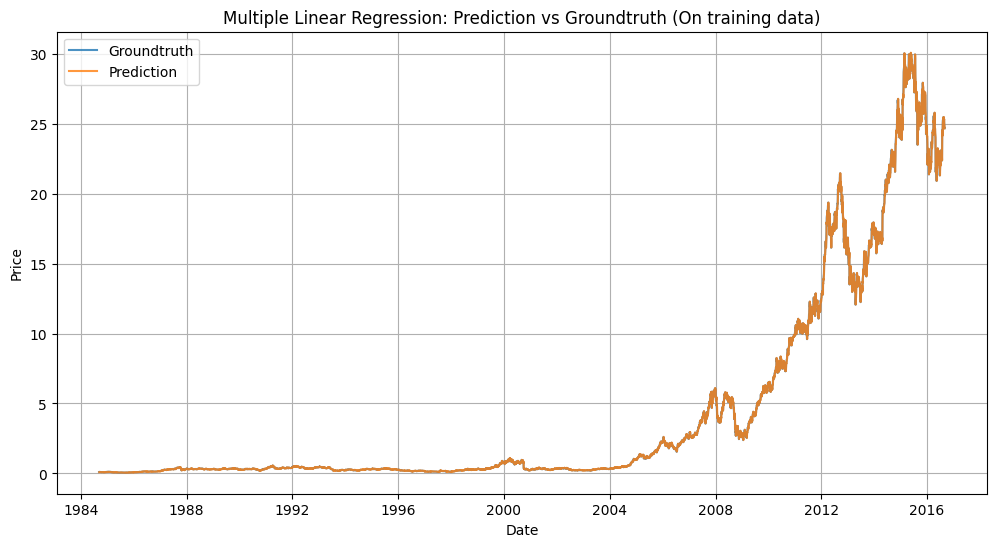

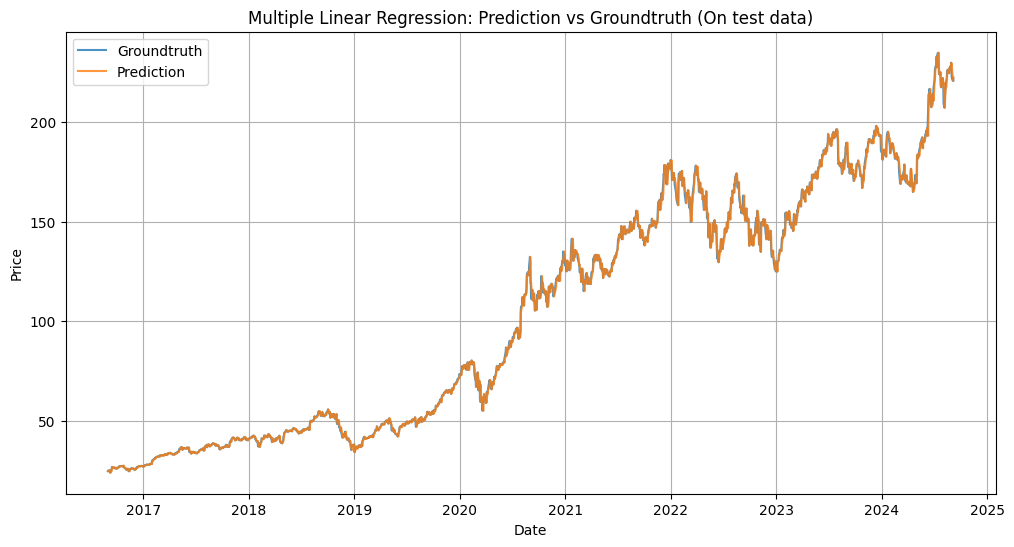

In [7]:
# 步骤六：结果可视化
# 6.1 利用plt函数可视化训练数据上的模型预测值和真实对比图，其中横轴是时间('Date')，纵轴是预测的股价
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train.values, label='Groundtruth', alpha=0.8)
plt.plot(y_train.index, y_pred_train, label='Prediction', alpha=0.8)
plt.title('Multiple Linear Regression: Prediction vs Groundtruth (On training data)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
# 6.1 利用plt函数可视化测试数据上的模型预测值和真实对比图，其中横轴是时间('Date')，纵轴是预测的股价
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Groundtruth', alpha=0.8)
plt.plot(y_test.index, y_pred, label='Prediction', alpha=0.8)
plt.title('Multiple Linear Regression: Prediction vs Groundtruth (On test data)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()